In [94]:
# Lopputyö 
# Viikkotehtavassa 2:  Askelmittari (datan_luku)
# Viikkotehtavassa 3:  Karttakuva, jossa kuljettu reitti
# Viikkotehtavassa 4:  Tehospektri -->?

# Tässä lasketaan:
# Askelmäärä laskettuna suodatuksen avulla:  askelta
# Askelmäärä laskettuna Fuorier-analyysin avulla:  askelta
# Keskinopeus: m/s
# Kokonaismatka: km
# Askelpituus on 50 cm

# (tämä löytyy GPS_Python luennolta 12.9.2024)

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

df = pd.read_csv('Location.csv')

# Haversinen kaava pisteiden välimatkojen laskemiseen
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points on the earth (specified in decimal degree)
    """

    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    #haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 +cos(lat1) *cos(lat2) *sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers.
    return c * r


In [101]:
# Lasketaan nopeus ja matk (vaikka ne olisivat jo valmiina datassa)
# Alustetaan tyhjät sarakkeet dataframeen
df['dist'] = np.zeros(len(df)) # Etäisyys pisteiden välillä
df['time_diff'] = np.zeros(len(df)) # Aika pisteiden välillä

for i in range(len(df)-1):
    # df.loc[i,'dist'] = haversine(lon1, lat1, lon2, lat2)

    # Tämä on kahden peräkkäisen pisteen välimatka metreinä
    df.loc[i,'dist'] = haversine(df['Longitude (°)'][i], df['Latitude (°)'][i], df['Longitude (°)'][i+1], df['Latitude (°)'][i+1])

    # Tämä on kahden peräkkäisen pisteen välimatka kilometreinä
    df.loc[i,'dist'] = haversine(df['Longitude (°)'][i], df['Latitude (°)'][i], df['Longitude (°)'][i+1], df['Latitude (°)'][i+1])*1000

    # Lasketaan myös peräkkäisten pisteiden välinen aika
    df.loc[i, 'time_diff'] = df['Time (s)'][i+1] - df['Time (s)'][i]
    
    df['velocity'] = df['dist']/df['time_diff'] # Nopeus pisteiden välillä = matkan / aikaan
    df['tot_dist'] = np.cumsum(df['dist'])


df.head()

,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m),dist,time_diff,velocity,tot_dist
0,22.976077,65.066385,25.504169,NaN,NaN,NaN,1200.000000,0.000000,0.000000,0.629391,0.000000,0.000000
1,23.605468,65.066385,25.504169,NaN,NaN,NaN,1204.402954,0.000000,385.400889,2.379609,161.959748,385.400889
2,25.985077,65.069782,25.502537,13.115118,0.491045,4.59,7.200000,116.199997,5.777614,1.000000,5.777614,391.178502
3,26.985077,65.069773,25.502415,12.815129,0.213095,4.59,4.700000,51.500000,2.344870,1.206000,1.944337,393.523372
4,28.191077,65.069785,25.502373,6.015128,0.131769,4.59,3.100000,24.700001,0.864202,1.000000,0.864202,394.387575


In [113]:
    #Kokonaisaika
    total_time = df['Time (s)'].iloc[-1] - df['Time (s)'].iloc[0]
    print("Kokonaisaika matkalle (s):", total_time)  
    total_time_min = (total_time / 60)
    print("Kokonaisaika matkalle (min):", total_time_min)  

    #Keskinopeus (GPS-datasta)
    average_speed = df['tot_dist'].iloc[-1] / total_time
    print("Keskinopeus (m/s):", average_speed)  

    #Kuljettu matka (GPS-datasta)
    print("Kuljettu matka (m):", df['tot_dist'].iloc[-1])
    print("Kuljettu matka (km):", (df['tot_dist'].iloc[-1])/1000)
    
    #Askelpituus (lasketun askelmäärän ja matkan perusteella)
    print("Askelpituus (fourier) (cm):", (df['tot_dist'].iloc[-1])*100/1615)
    # Tällöin askelmäärä on 1615.0000000000002 askelta

    print("Askelpituus (cm):", (df['tot_dist'].iloc[-1])*100/3344)
    # Kiihtyvyysdatasta: Tällöin askelmäärä on 3344

Kokonaisaika matkalle (s): 823.2160000299999
Kokonaisaika matkalle (min): 13.720266667166666
Keskinopeus (m/s): 1.83867063969589
Kuljettu matka (m): 1513.6230893830518
Kuljettu matka (km): 1.5136230893830518
Askelpituus (fourier) (cm): 93.72279191226328
Askelpituus (cm): 45.26384836671806


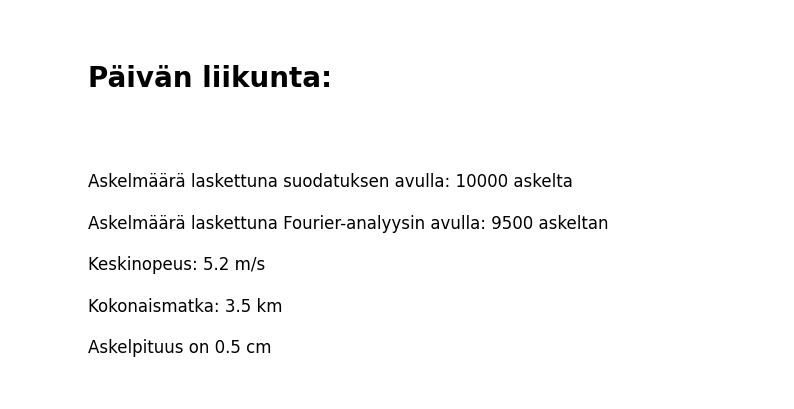

In [ ]:
# Lopputyö 
# Viikkotehtavassa 2:  Askelmittari (datan_luku)
# Viikkotehtavassa 3:  Karttakuva, jossa kuljettu reitti
# Viikkotehtavassa 4:  Tehospektri -->?

# Tulosta alla oleva 
# Päivän liikunta:
# Askelmäärä laskettuna suodatuksen avulla:  askelta
# Askelmäärä laskettuna Fuorier-analyysin avulla:  askelta
# Keskinopeus: m/s
# Kokonaismatka: km
# Askelpituus on 50 cm

import pandas as pd
import matplotlib.pyplot as plt

# Muuta nämä myöhemmin kaavan mukaisiksi
askelmaara_suodatus = 10000
askelmaara_fourier = 9500
keskinopeus = 5.2
kokonaismatka = 3.5
askelpituus = 0.5


# Luo kuva
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')  # Poista akselit näkyvistä

ax.text(0.1, 0.8, "Päivän liikunta:", fontsize=20, fontweight='bold')

# Määritä teksti ja sen sijainti
teksti = """

\n

Askelmäärä laskettuna suodatuksen avulla: {askelmaara_suodatus} askelta\n
Askelmäärä laskettuna Fourier-analyysin avulla: {askelmaara_fourier} askeltan\n
Keskinopeus: {keskinopeus} m/s\n
Kokonaismatka: {kokonaismatka} km\n
Askelpituus on {askelpituus} cm\n
""".format(askelmaara_suodatus=askelmaara_suodatus,
           askelmaara_fourier=askelmaara_fourier,
           keskinopeus=keskinopeus,
           kokonaismatka=kokonaismatka,
           askelpituus=askelpituus)

# Lisää teksti kuvaan
ax.text(0.1, 0.0, teksti, fontsize=12)

# Kuvaajasta näkee, että n. 1,8 Hz kohdalla on selkeästi dominoiva piikki
#print('Kävelydatan tehokkain taajuus on',freq[L][psd[L]==np.max(psd[L])][0], 'Hz')
print('Tämä vastaa askeleeseen kuluvaa aikaa',1/freq[L][psd[L]==np.max(psd[L])][0], 's')
print('Tällöin askelmäärä on', freq[L][psd[L]==np.max(psd[L])][0]*np.max(t), 'askelta')

# Näytä kuva
plt.show()

In [52]:
# Suodatetun kiihtyvysdatan y-komponentti

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Linear_Acceleration.csv')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.016126,-0.094763,0.323130,0.537742
1,0.026106,-0.197659,0.373882,0.560068
2,0.036115,-0.227172,0.350180,0.470242
3,0.046093,-0.043843,0.315969,0.182305
4,0.056102,0.043308,0.285419,-0.125607


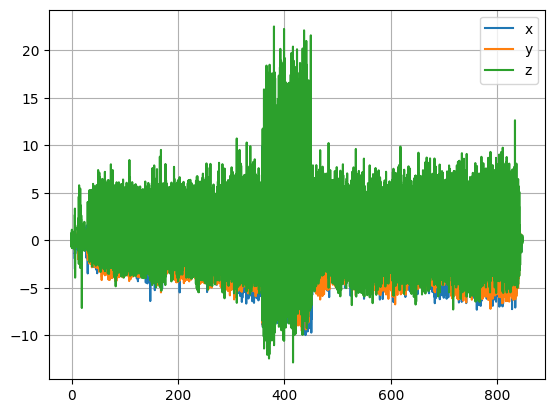

0        0.323130
1        0.373882
2        0.350180
3        0.315969
4        0.285419
           ...   
84700    0.077821
84701    0.086161
84702    0.074389
84703    0.080579
84704    0.090061
Name: Linear Acceleration y (m/s^2), Length: 84705, dtype: float64

In [56]:
import matplotlib.pyplot as plt

#"Time (s)","Linear Acceleration x (m/s^2)","Linear Acceleration y (m/s^2)","Linear Acceleration z (m/s^2)"
# Piirretään kuvaaja:
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.legend(['x','y','z'])
plt.grid()
plt.show()

df['Linear Acceleration y (m/s^2)']

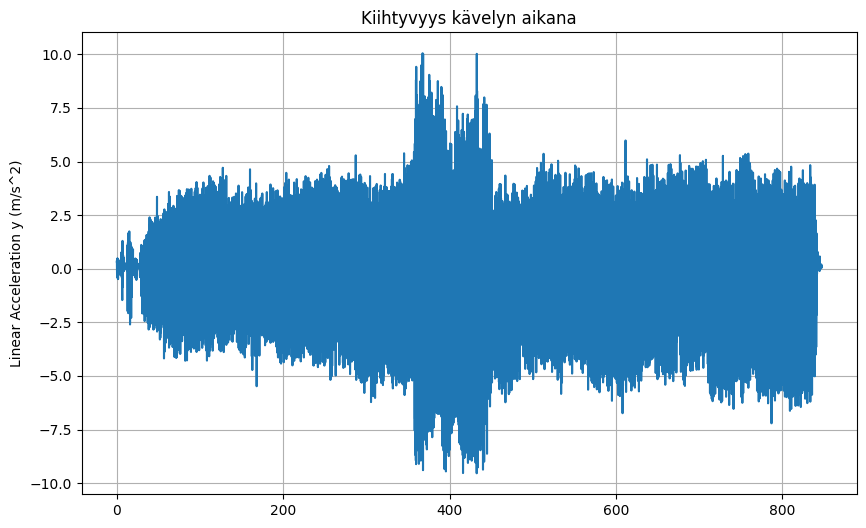

In [62]:
# Y-akselilla on selkein ero siihen, kun tein kotona käännöstä. Siksi mielestäni y-akselilla oleva kuvaaja, voisi sopia parhaiten.

#component = 'y'  # Muuta tarvittaessa

# Piirrä kuvaaja
plt.figure(figsize=(10, 6))
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
#plt.xlabel('Linear Acceleration x (m/s^2) (' + Linear Acceleration y (m/s^2) + ')')
plt.ylabel('Linear Acceleration y (m/s^2)')
plt.title('Kiihtyvyys kävelyn aikana')
plt.grid(True)
plt.show()

In [63]:
import scipy
# Tuodaan filtterifunktiot
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # get the filter coefficients
    b, a = butter (order, normal_cutoff, btype='low', analog=False)
    y= filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # get the filter coefficients
    b, a = butter (order, normal_cutoff, btype='low', analog=False)
    y= filtfilt(b, a, data)
    return y

In [64]:
# Filtterien parametrit
T = df['Time (s)'][len(df['Time (s)'])-1] - df['Time (s)'][0] # koko datan pituus
n = len(df['Time (s)']) # Datapisteiden lkm
fs = n/T # Näytteenottotaajuus (olettaen vakioksi)
nyq = fs/2 # Nyqvistin taajuus
order = 3 # Suodattimen kertaluku
#(Jos halutaan käyttää yli- tai alipäästösuodatinta, eli määritellään taajuus, josta ei enää mennä läpi)
cutoff = 1/(0.2) #Cutt-off taajuus

In [67]:
# Kokeillaan suodatinta

df['filter_a_y'] = butter_lowpass_filter(df['Linear Acceleration y (m/s^2)'], cutoff, fs, nyq, order)
#df['filter_a_x'] = butter_lowpass_filter(df['Linear Acceleration x (m/s^2)'], cutoff, fs, nyq, order)
#df['filter_a_z'] = butter_lowpass_filter(df['Linear Acceleration z (m/s^2)'], cutoff, fs, nyq, order)

Suodatetun kiihtyvyysdatan y-komponentin kuvaaja


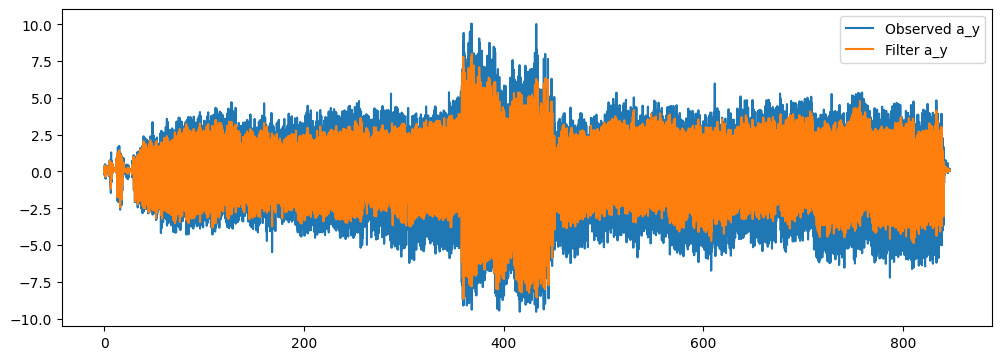

In [70]:
# Piirretään kuva

print("Suodatetun kiihtyvyysdatan y-komponentin kuvaaja")

plt.figure(figsize=(12,14))
plt.subplot(3,1,2)
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['filter_a_y'])
plt.legend(['Observed a_y', 'Filter a_y'])


Askelten määrä laskettuna suodatetusta kiihtyvyysdatasta: 3344


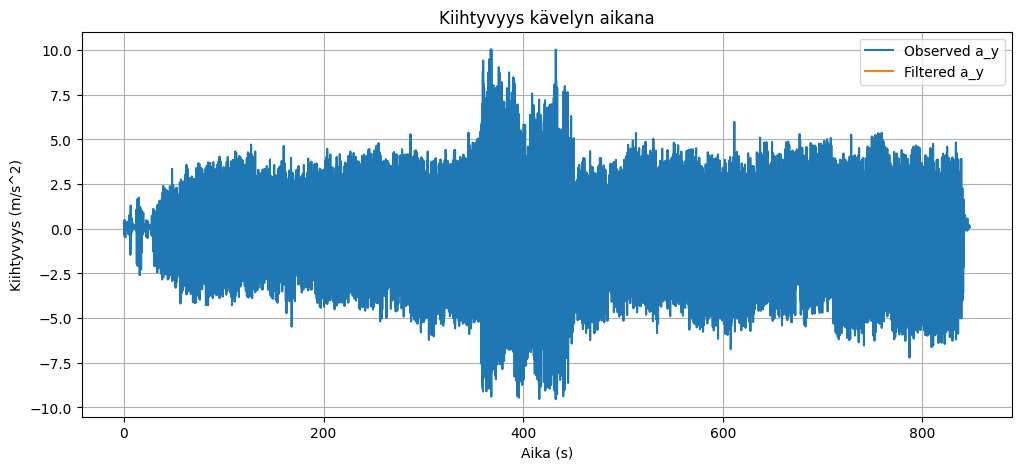

In [74]:
#- Askelmäärä laskettuna suodatetusta kiihtyvyysdatasta
#- Askelmäärä laskettuna kiihtyvyysdatasta Fourier-analyysin perusteella


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Lue data CSV-tiedostosta (muuta tiedostonimi tarvittaessa)
#df = pd.read_csv("Linear_Acceleration.csv")

# Määritä cutoff-taajuudet
lowcut = 0.5
highcut = 3.0
fs = 100  # Esim. näytetaajuus 100 Hz
nyq = 0.5 * fs
order = 2

# Suodata data
b, a = butter(order, [lowcut, highcut], btype='bandpass', fs=fs)
df['filter_a_y'] = filtfilt(b, a, df['Linear Acceleration y (m/s^2)'])
#filtered_data = filtfilt(b, a, data)

# Laske askelten määrä
zero_crossings = np.where(np.diff(np.sign(df['filter_a_y'])) != 0)[0]
num_steps = len(zero_crossings)
print("Askelten määrä laskettuna suodatetusta kiihtyvyysdatasta:", num_steps)

def butter_bandpass_filter(data, lowcut, highcut, fs, nyq, order):
    # ... (funktion toteutus)
    return #filtered_data

# Suodata data (kaistanpäästösuodatin)
df['filter_a_y'] = butter_bandpass_filter(df['Linear Acceleration y (m/s^2)'], lowcut, highcut, fs, nyq, order)
#def['filter_a_x'] = butter_bandpass_filter(df['Acceleration x (m/s^2)'], lowcut, highcut, fs, nyq, order)
#def['filter_a_z'] = butter_bandpass_filter(df['Acceleration z (m/s^2)'], lowcut, highcut, fs, nyq, order)

# Piirretään kuva
#plt.figure(figsize=(12,5))
#plt.plot(df['Time (s)'],df['Acceleration y (m/s^2)'])
#plt.plot(df['Time (s)'],df['filter_a_y'])
#plt.legend(['Observed a_y', 'Filter a_y'])
#plt.grid(True)
#plt.show()

# Vaihtoehtoinen
# Piirretään kuva
plt.figure(figsize=(12,5))
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='Observed a_y')
plt.plot(df['Time (s)'], df['filter_a_y'], label='Filtered a_y')
plt.legend()
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s^2)')
plt.title('Kiihtyvyys kävelyn aikana')
plt.grid(True)
plt.show()


Askelten määrä laskettuna kiihtyvyysdatasta Fourier-analyysin perusteella


C:\Users\OMISTAJA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\OMISTAJA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


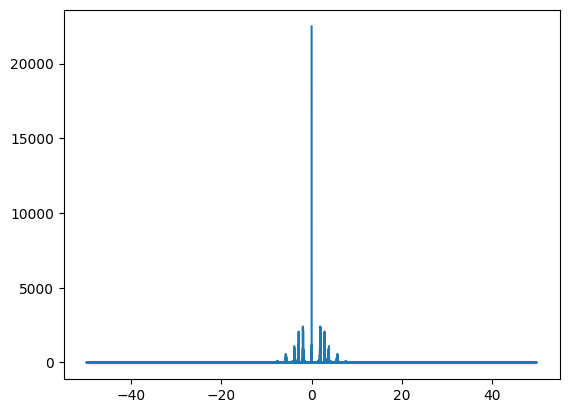

In [77]:
# Askelmäärä laskettuna kiihtyvyysdatasta Fourier-analyysin perusteella
# Fourier -analyysi

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Linear_Acceleration.csv')
df.head()

#"Time (s)","Linear Acceleration y (m/s^2)"
f = df['Linear Acceleration y (m/s^2)']
t = df['Time (s)']
N = len(df) # Havaintojen määrä
dt = np.max(t)/len(t) # Oletetaan sämpläysten vakioksi

fourier = np.fft.fft(f,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet

plt.plot(freq,psd)

print("Askelten määrä laskettuna kiihtyvyysdatasta Fourier-analyysin perusteella")


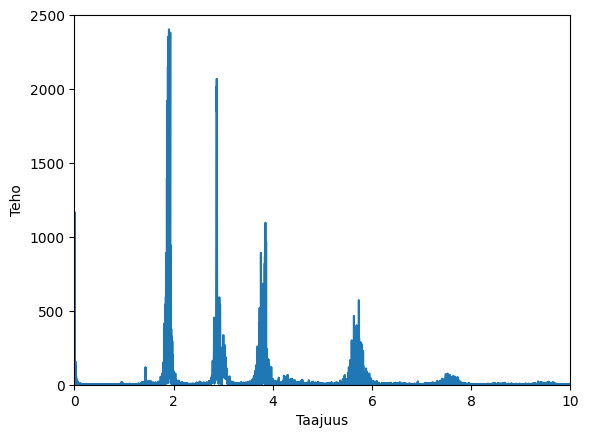

In [90]:
# Tehospektri

# Linear Acceleration.csv
# Sopii hyvin Jos haluat tutkia toistuvia liikemalleja tai värähtelyitä, kuten:
# Ihmisen liikkeet (kävely, juoksu)
# Miksi: Kiihtyvyysdata sisältää usein selkeitä taajuuskomponentteja, jotka kuvaavat näitä liikkeitä. 
# Fourier-muunnos auttaa sinua löytämään nämä taajuudet.

ax.text(0.1, 0.8, "Tehospektri", fontsize=20, fontweight='bold')

# Piirrä tehospektrin kuvaaja ja määrittele, mikä on tehokkain taajuus. 
# Ilmaise tulokset selkeästi. Palauta pdf, jossa koodi ja kuvaajat ovat selkeästi näkyvillä. 

L = np.arange(1,int(N/2)) # Rajataan pois nollataajuus ja negatiiviset taajuudet

#plt.plot(freq[L])
plt.plot(freq[L], psd[L].real)
plt.ylabel('Teho')
plt.xlabel('Taajuus')
plt.grid
plt.axis([0,10,0,2500])
plt.show()

In [91]:
# Määrittele tehospektristä tehokkain taajuus
# Vastaako tämä oletettua askeltaajuutta?
# Laske askelten kokonaismäärä askeltaajuuden perusteella?

# Kuvaajasta näkee, että n. 1,9 Hz, 2,9 Hz, 3,8 Hz ja 5,7 Hz kohdalla on selkeästi isoimmat piikit
print('Kävelydatan tehokkain taajuus on',freq[L][psd[L]==np.max(psd[L])][0], 'Hz')
print('Tämä vastaa askeleeseen kuluvaa aikaa',1/freq[L][psd[L]==np.max(psd[L])][0], 's')
print('Tällöin askelmäärä on', freq[L][psd[L]==np.max(psd[L])][0]*np.max(t), 'askelta')

Kävelydatan tehokkain taajuus on 1.9065458670658306 Hz
Tämä vastaa askeleeseen kuluvaa aikaa 0.5245087554798761 s
Tällöin askelmäärä on 1615.0000000000002 askelta


In [ ]:
- Keskinopeus (GPS-datasta)

- Kuljettu matka (GPS-datasta)

- Askelpituus (lasketun askelmäärän ja matkan perusteella)

In [ ]:
#Karttakuva

# (tämä löytyy GPS_Python luennolta 12.9.2024)
# Karttakuvan piirtäminen

import folium

print('Karttakuva')

# Luodaan "karttapohja", jossa on määritelty keskipisteen koordinaatit ja zoomauksen taso alussa
start_lat = df['Latitude (°)'].mean() # Lasketaan latitude -arvojen keskiarvo
start_long = df['Longitude (°)'].mean() # Lasketaan longitude -arvojen keskiarvo
my_map = folium.Map(location = [start_lat,start_long], zoom_start = 14)

# Piirretään havainnot kartalle
folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'red', weight = 2.5, opacity = 1).add_to(my_map)

# Tallennetaan kartta
my_map.save('loppukartta.html')
my_map

Karttakuva
